# Data Preprocessing


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sn
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore')

train_data = pd.read_csv('day6train.csv')
test_data = pd.read_csv('day6test.csv')

print(train_data.head())
print(test_data.head())

print(train_data.shape)
print(test_data.shape)

print(train_data.dtypes)
# print(test_data.dtypes)

print(train_data.isnull().sum())

print("First we will deal the missing values of Age")

x=(train_data['Age'].isnull().sum()/train_data['Age'].shape[0])*100

print('Percent of missing "Age" records is %.2f%%' %( x ))
print("Since the Age variable is around %.0f%% missing we will fill the missing values with median" % (x))
print('Median of Age column is %.2f%%' % (train_data['Age'].median(skipna=True)))

train_data['Age'].fillna(train_data['Age'].median(skipna=True),inplace=True)
print('\nNow dealing with Cabin')

x=(train_data['Cabin'].isnull().sum()/train_data['Cabin'].shape[0])*100

print('Percent of missing "Cabin" records is %.2f%%' %( x ))
print('Since the missing values are greater than 20%, we will ignore this variable')
train_data=train_data.drop('Cabin', axis=1)

print('\nNow dealing with Embarked')

x=(train_data['Embarked'].isnull().sum()/train_data['Embarked'].shape[0])*100

print('Percent of missing "Embarked" records is %.2f%%' %( x ))
print('We will fill these missing values again with the most commonly repeating value ')
print(train_data['Embarked'].value_counts())

train_data['Embarked'].fillna('S',inplace=True)
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)



print('\nMissing values in train_data dataset')
print(training.isnull().sum())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [2]:
print('\n\n Now for Testing data set, Applying the same changes')
print(test_data.isnull().sum())

test_data['Age'].fillna(test_data['Age'].median(skipna=True), inplace=True)

test_data['Fare'].fillna(test_data['Fare'].median(skipna=True), inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

print(test_data.isnull().sum())

testing=pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])

testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)




 Now for Testing data set, Applying the same changes
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64



Now making a correlations matrix for our training and testing data


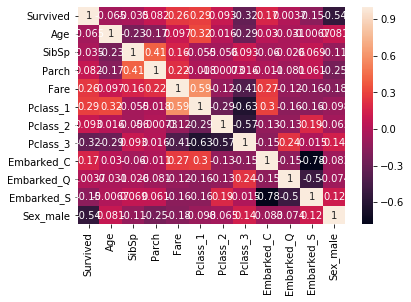


Similarly for testing data


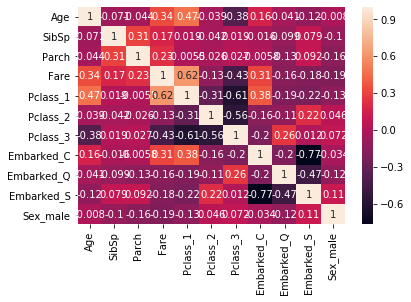

In [3]:
print('\nNow making a correlations matrix for our training and testing data')

cmatrix=training.corr()
sn.heatmap(cmatrix, annot=True)
plt.show()

print('\nSimilarly for testing data')
cmatrix=testing.corr()
sn.heatmap(cmatrix, annot= True)
plt.show()

# Model Fitting and Accuracy 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X=training.drop('Survived', axis=1)
y= training['Survived']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=2)

model=LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print("Accuracy is %2.3f" % accuracy_score(y_test, y_pred))

print("The following is the Confusion Matrix for the data")
print(confusion_matrix(y_test,y_pred))

Accuracy is 0.782
The following is the Confusion Matrix for the data
[[91  9]
 [30 49]]


# Testing

In [5]:
print("Predicting for Testing Values")

Y_Pred= model.predict(testing)

print("For data:\n", testing.head())
print("\nThe output is:\n",Y_Pred[0:5])

Predicting for Testing Values
For data:
     Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  Embarked_C  \
0  34.5      0      0   7.8292         0         0         1           0   
1  47.0      1      0   7.0000         0         0         1           0   
2  62.0      0      0   9.6875         0         1         0           0   
3  27.0      0      0   8.6625         0         0         1           0   
4  22.0      1      1  12.2875         0         0         1           0   

   Embarked_Q  Embarked_S  Sex_male  
0           1           0         1  
1           0           1         0  
2           1           0         1  
3           0           1         1  
4           0           1         0  

The output is:
 [0 0 0 0 1]
